In [14]:
import pandas as pd
import numpy as np
from binance.client import Client
import binance_keys as bk


In [15]:
api_key = bk.api_key
secret_key = bk.secret_key

In [16]:
client = Client(api_key, secret_key)

In [17]:
start = '2022-08-18'
end = '2022-08-19'

In [18]:
timefraim_dict = {
    '12h': Client.KLINE_INTERVAL_12HOUR,
    '15m': Client.KLINE_INTERVAL_15MINUTE,
    '1d': Client.KLINE_INTERVAL_1DAY,
    '1h': Client.KLINE_INTERVAL_1HOUR,
    '1m': Client.KLINE_INTERVAL_1MINUTE,
    '1M': Client.KLINE_INTERVAL_1MONTH,
    '1w': Client.KLINE_INTERVAL_1WEEK,
    '2h': Client.KLINE_INTERVAL_2HOUR,
    '30m': Client.KLINE_INTERVAL_30MINUTE,
    '3d': Client.KLINE_INTERVAL_3DAY,
    '3m': Client.KLINE_INTERVAL_3MINUTE,
    '4h': Client.KLINE_INTERVAL_4HOUR,
    '5m': Client.KLINE_INTERVAL_5MINUTE,
    '6h': Client.KLINE_INTERVAL_6HOUR,
    '8h': Client.KLINE_INTERVAL_8HOUR} 



In [19]:


def getting_candles (asset, interval, start, end):
    klines = client.get_historical_klines(asset, timefraim_dict[interval], start, end)
    return klines


def data_prepation (raw_data):
    df = pd.DataFrame(raw_data)
    df.columns = ['open_time', 'open', 'high', 'low', 'close', 'volume', 
                  'close_time', 'q_vol', 'trades', 'taker_buy_volume', 'taker_q_volume', 'ignored']
    
    df['open_time'] = pd.to_datetime(df['open_time'], unit = 'ms')
    df['close_time'] = pd.to_datetime(df['close_time'], unit = 'ms')
    
    df[['open', 'high', 'low', 'close',
    'volume', 'q_vol', 'trades', 
    'taker_buy_volume', 'taker_q_volume']] = df[['open', 'high', 'low', 'close',
                                                 'volume', 'q_vol', 'trades',
                                                 'taker_buy_volume', 'taker_q_volume']].astype('float')
    
    df[['q_vol', 'taker_q_volume']] = round(df[['q_vol', 'taker_q_volume']],1)
    
    return df

def data_features (df):
    df['lim_ord_vol'] = df['q_vol'] - df['taker_q_volume']
    df['mt_ratio'] = round(df['lim_ord_vol'] / df['taker_q_volume'],2)

    df = df.fillna(0)


    return df



In [27]:
raw_data = getting_candles('CFXBTC', '1m', start, end)

In [28]:
prep_df = data_prepation(raw_data)

In [29]:
upd_df = data_features(prep_df)
upd_df.head(1)

,open_time,open,high,low,close,volume,close_time,q_vol,trades,taker_buy_volume,taker_q_volume,ignored,lim_ord_vol,mt_ratio
0,2022-08-18,0.000002,0.000002,0.000002,0.000002,0.0,2022-08-18 00:00:59.999,0.0,0.0,0.0,0.0,0,0.0,0.0


In [30]:
x1 = upd_df['open_time']
y1 = upd_df['mt_ratio']
y2 = upd_df['close']

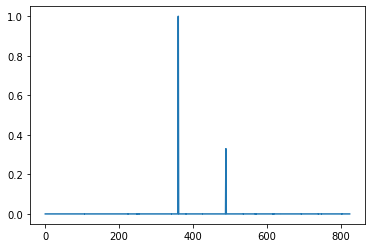

In [31]:
y1.plot()

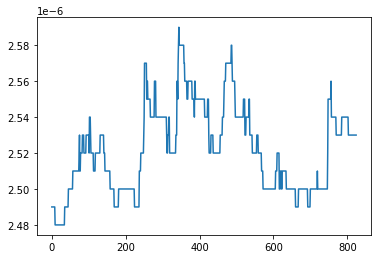

In [32]:
y2.plot()

In [33]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Bar(x=x1, y=y1, name="ratio",  marker_color='black', opacity = 1),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=x1, y=y2, name="price"),
    secondary_y=True,
)

#fig.update_traces()
fig.show()